請就所提供的資料進行以下分析：

(1) 針對此資料進行描述性分析。

(2) 利用視覺化圖形分析台北市107年房價狀況。

(3) 分析台北市107年房地(交易標的為房屋＋建物，使用為住家)單位價格之主要影響變數。

(4) 請自行查詢下載不同年度台北市實價登錄資料，下載資料後請分析五年內台北房價之變化。

#原始資料&載入套件

In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

--2022-05-21 07:02:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.128.101, 142.250.128.138, 142.250.128.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.128.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ujphs19e60c9bh9ahv92tnmio0ftukr4/1653116550000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-05-21 07:02:51--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ujphs19e60c9bh9ahv92tnmio0ftukr4/1653116550000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|172.217.2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/巨量資料分析/data/台北房價.xlsx')

#第一題

針對此資料進行描述性分析

In [ ]:
data.describe()

,土地移轉總面積平方公尺,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價元平方公尺,車位移轉總面積平方公尺,車位總價元
count,16348.000000,0.0,1.634800e+04,1.312400e+04,16348.000000,16348.000000,16348.000000,16348.000000,1.634800e+04,1.540200e+04,16348.000000,1.634800e+04
mean,47.266354,NaN,1.065302e+06,8.626512e+05,140.145257,2.044409,1.295265,1.280707,2.751635e+07,1.870734e+05,13.193389,6.424626e+05
std,253.512133,NaN,9.507443e+03,1.582364e+05,887.725154,1.664195,0.880856,1.039350,1.493584e+08,1.744566e+05,70.049039,2.532144e+06
min,0.000000,NaN,6.510070e+05,2.112000e+03,0.000000,0.000000,0.000000,0.000000,1.756000e+03,0.000000e+00,0.000000,0.000000e+00
25%,10.170000,NaN,1.061126e+06,7.203310e+05,50.007500,1.000000,0.000000,1.000000,8.700000e+06,1.258240e+05,0.000000,0.000000e+00
50%,22.705000,NaN,1.070130e+06,8.611100e+05,97.395000,2.000000,2.000000,1.000000,1.500000e+07,1.689710e+05,0.000000,0.000000e+00
75%,36.600000,NaN,1.070421e+06,1.021107e+06,159.225000,3.000000,2.000000,2.000000,2.680000e+07,2.216695e+05,13.905000,0.000000e+00
max,15777.310000,NaN,1.070807e+06,1.070502e+06,96583.650000,49.000000,8.000000,30.000000,1.469800e+10,1.604285e+07,7886.940000,1.972000e+08


In [ ]:
f=data.groupby('鄉鎮市區')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_鄉鎮市區'])
f=data.groupby('鄉鎮市區')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_鄉鎮市區"])
flist.merge(plist,on = '鄉鎮市區')

,Frequence_鄉鎮市區,Percentage_鄉鎮市區
鄉鎮市區,,
中山區,2167,0.132554
中正區,951,0.058172
信義區,1034,0.063249
內湖區,1961,0.119954
北投區,2061,0.126070
南港區,666,0.040739
士林區,1373,0.083986
大同區,644,0.039393
大安區,1614,0.098728


In [ ]:
f=data.groupby('交易標的')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_交易標的'])
f=data.groupby('交易標的')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_交易標的"])
flist.merge(plist,on = '交易標的')

,Frequence_交易標的,Percentage_交易標的
交易標的,,
土地,1364,0.083435
建物,82,0.005016
房地(土地+建物),9030,0.552361
房地(土地+建物)+車位,4932,0.301688
車位,940,0.057499


In [ ]:
f=data.groupby('都市土地使用分區')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_都市土地使用分區'])
f=data.groupby('都市土地使用分區')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_都市土地使用分區"])
flist.merge(plist,on = '都市土地使用分區')

,Frequence_都市土地使用分區,Percentage_都市土地使用分區
都市土地使用分區,,
住,9274,0.567287
其他,2229,0.136347
商,4371,0.267372
工,309,0.018901
農,45,0.002753


In [ ]:
f=data.groupby('主要用途')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_主要用途'])
f=data.groupby('主要用途')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_主要用途"])
flist.merge(plist,on = '主要用途')

,Frequence_主要用途,Percentage_主要用途
主要用途,,
住商用,104,0.006362
住家用,9868,0.603621
住工用,4,0.000245
停車空間,234,0.014314
商業用,1297,0.079337
國民住宅,2,0.000122
工業用,114,0.006973
見使用執照,398,0.024345
見其他登記事項,2223,0.135980


In [ ]:
f=data.groupby('主要建材')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_主要建材'])
f=data.groupby('主要建材')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_主要建材"])
flist.merge(plist,on = '主要建材')

,Frequence_主要建材,Percentage_主要建材
主要建材,,
加強磚造,688,0.042085
土磚石混合造,7,0.000428
土造,4,0.000245
木造,22,0.001346
磚造,55,0.003364
見使用執照,48,0.002936
見其他登記事項,463,0.028322
鋼筋混凝土造,12716,0.777832
鋼骨混凝土造,23,0.001407


In [ ]:
f=data.groupby('車位類別')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_車位類別'])
f=data.groupby('車位類別')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=["Percentage_車位類別"])
flist.merge(plist,on = '車位類別')

,Frequence_車位類別,Percentage_車位類別
車位類別,,
一樓平面,17,0.001040
其他,102,0.006239
升降平面,179,0.010949
升降機械,408,0.024957
坡道平面,4455,0.272510
坡道機械,501,0.030646
塔式車位,232,0.014191


#第二題

利用視覺化圖形分析台北市107年房價狀況

In [ ]:
a=data.groupby('鄉鎮市區').mean()[['總價元']].sort_values(by=['總價元'])
a=round(a,2)
a

,總價元
鄉鎮市區,
萬華區,17147446.07
北投區,18378180.14
文山區,18620363.63
大同區,21323565.58
松山區,25450625.13
中山區,25556699.76
士林區,25676563.87
大安區,29621797.38
中正區,30103971.14


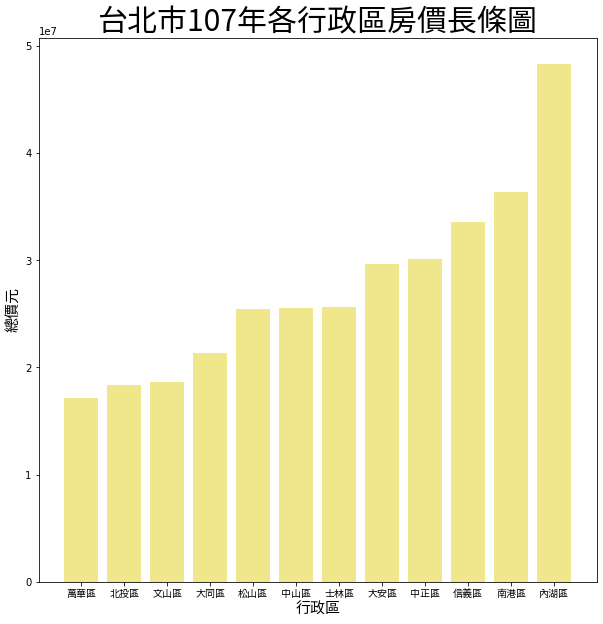

In [ ]:
plt.rcParams['figure.figsize']=(10.0,10.0)
districts = a.index
amounts = a['總價元']
x = np.arange(len(districts))
plt.bar(x, amounts, color=['#F0E68C'])
plt.xticks(x, districts, fontproperties=myfont, fontsize=10)
plt.xlabel('行政區', fontproperties=myfont, fontsize=15)
plt.ylabel('總價元', fontproperties=myfont, fontsize=15)
plt.title('台北市107年各行政區房價長條圖', fontproperties=myfont, fontsize=30)
plt.show()

#第三題數據前處理

In [ ]:
#選擇 '交易標的' 為 '房地(土地+建物)' 以及 '主要用途' 為 '住家用'
a2=data.groupby('交易標的')
b2=a2.get_group('房地(土地+建物)')
c2=b2.groupby('主要用途')
d2=c2.get_group('住家用')

#把用不到的欄位刪除並去除缺失值
d2drop=['土地區段位置建物區段門牌','建築完成年月','備註','編號']
for i in d2drop:
  d2=d2.drop([i],axis=1)
d2=d2.dropna(axis=1,how='all')
d2.head()

,鄉鎮市區,交易標的,土地移轉總面積平方公尺,都市土地使用分區,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,...,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元
3,文山區,房地(土地+建物),19.17,住,1070311.0,土地2建物1車位0,四層,十層,華廈(10層含以下有電梯),住家用,...,3.0,2.0,2.0,有,有,12080000.0,149357.0,NaN,0.0,0.0
4,文山區,房地(土地+建物),16.33,商,1070408.0,土地2建物1車位0,三層,五層,公寓(5樓含以下無電梯),住家用,...,3.0,2.0,2.0,有,無,4009074.0,68020.0,NaN,0.0,0.0
12,萬華區,房地(土地+建物),14.51,住,1070419.0,土地1建物1車位0,二層,五層,公寓(5樓含以下無電梯),住家用,...,3.0,1.0,1.0,有,無,4360000.0,101348.0,NaN,0.0,0.0
14,內湖區,房地(土地+建物),17.26,住,1070401.0,土地1建物1車位0,七層，電梯樓梯間,十六層,住宅大樓(11層含以上有電梯),住家用,...,2.0,2.0,1.0,有,有,15880000.0,202293.0,NaN,0.0,0.0
15,中山區,房地(土地+建物),3.86,商,1070403.0,土地1建物1車位0,十層,十一層,套房(1房1廳1衛),住家用,...,1.0,1.0,1.0,有,有,6100000.0,119234.0,NaN,0.0,0.0


In [ ]:
d2.columns

Index(['鄉鎮市區', '交易標的', '土地移轉總面積平方公尺', '都市土地使用分區', '交易年月日', '交易筆棟數', '移轉層次',
       '總樓層數', '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳',
       '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別',
       '車位移轉總面積平方公尺', '車位總價元'],
      dtype='object')

#第三題

分析台北市107年房地(交易標的為房屋＋建物，使用為住家)單位價格之主要影響變數

In [ ]:
#1量對多量的相關分析

price_set=['土地移轉總面積平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','總價元','單價元平方公尺','車位移轉總面積平方公尺','車位總價元']
price_corr=d2[price_set].corr()
corr_result=pd.DataFrame(price_corr['單價元平方公尺'])

from scipy import stats
name=[]
alist=[]
pvlist=[]
meanlist=[]
for i in range(len(price_set)):
  (r,pvalue)=stats.pearsonr(d2['單價元平方公尺'],d2[price_set[i]]) 
  name.append(price_set[i])
  alist.append(r)
  pvlist.append(pvalue)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
result=pd.DataFrame(alist,name,columns=['Correlation'])
result.insert(1,'p-value',pvlist)
result.insert(2,'平均數',d2.describe().T['mean']) 
result=result.sort_values(by=['p-value'])[::-1]
result

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Correlation,p-value,平均數
車位總價元,NaN,NaN,0.000
車位移轉總面積平方公尺,NaN,NaN,0.000
建物現況格局-衛,0.023,0.060,1.485
建物現況格局-房,-0.052,0.000,2.435
建物現況格局-廳,-0.061,0.000,1.558
單價元平方公尺,1.000,0.000,176377.481
總價元,0.551,0.000,16418986.752
土地移轉總面積平方公尺,0.472,0.000,25.702


In [ ]:
#1量對多類的變異數分析

a=['鄉鎮市區','交易標的','都市土地使用分區','交易年月日','交易筆棟數','移轉層次','總樓層數','建物型態','主要用途','主要建材','建物移轉總面積平方公尺','建物現況格局-隔間','有無管理組織','車位類別']
F_list =[]
p_list =[]
name_list=[]
for i in a:
  F,p = stats.f_oneway(*[s for idx, s in d2.groupby(i).單價元平方公尺])
  F_list.append(F)
  p_list.append(p)
  name_list.append(i)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
result1=pd.DataFrame(F_list,name_list,columns=['f-value'])
result1.insert(1,'p-value',p_list)
result1=result1.sort_values(by=['p-value'])[::-1]
result1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3347: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3348: RuntimeWarning: invalid value encountered in double_scalars
  msw = sswn / dfwn


,f-value,p-value
車位類別,NaN,NaN
主要用途,NaN,NaN
交易標的,NaN,NaN
建物移轉總面積平方公尺,0.414,1.000
交易年月日,0.607,1.000
都市土地使用分區,5.011,0.002
有無管理組織,25.795,0.000
移轉層次,1.981,0.000
建物現況格局-隔間,36.490,0.000
交易筆棟數,4.977,0.000


In [ ]:
d2.groupby('都市土地使用分區').mean()['單價元平方公尺'].to_frame()

,單價元平方公尺
都市土地使用分區,
住,169943.415
其他,195328.246
商,191243.244
工,134136.500


In [ ]:
d2.groupby('有無管理組織').mean()['單價元平方公尺'].to_frame()

,單價元平方公尺
有無管理組織,
有,190936.924
無,164353.855


In [ ]:
d2.groupby('移轉層次').mean()['單價元平方公尺'].to_frame().sort_values(by=['移轉層次'])[::-1]

,單價元平方公尺
移轉層次,
騎樓，一層,292275.000
露台，二層,123608.000
露台，三層,178963.000
陽台，屋頂突出物,144861.000
陽台，四層,117964.667
...,...
一層，二層，三層，四層，屋頂突出物,184765.000
一層，二層，三層，四層,146600.000
一層，二層，三層,121012.000


In [ ]:
d2.groupby('建物現況格局-隔間').mean()['單價元平方公尺'].to_frame()

,單價元平方公尺
建物現況格局-隔間,
有,172657.241
無,242833.503


In [ ]:
d2.groupby('交易筆棟數').mean()['單價元平方公尺'].to_frame().sort_values(by=['交易筆棟數'])[::-1]

,單價元平方公尺
交易筆棟數,
土地9建物1車位0,151408.800
土地8建物2車位0,80906.000
土地8建物1車位0,131087.071
土地7建物1車位0,123363.087
土地6建物1車位0,166912.786
土地5建物1車位0,573053.270
土地4建物3車位0,179285.000
土地4建物2車位0,116881.500
土地4建物1車位0,162225.248


In [ ]:
d2.groupby('鄉鎮市區').mean()['單價元平方公尺'].to_frame().sort_values(by=['單價元平方公尺'])[::-1]

,單價元平方公尺
鄉鎮市區,
大安區,248760.419
中正區,214676.458
松山區,198677.867
信義區,197771.864
中山區,184599.578
士林區,183509.669
大同區,155693.468
內湖區,149954.433
南港區,144811.915


In [ ]:
d2.groupby('建物型態').mean()['單價元平方公尺'].to_frame().sort_values(by=['單價元平方公尺'])[::-1]

,單價元平方公尺
建物型態,
透天厝,373088.257
店面(店鋪),325967.030
辦公商業大樓,218265.960
其他,215510.125
住宅大樓(11層含以上有電梯),203062.403
套房(1房1廳1衛),190110.140
華廈(10層含以下有電梯),181457.034
公寓(5樓含以下無電梯),143828.405


In [ ]:
d2.groupby('主要建材').mean()['單價元平方公尺'].to_frame().sort_values(by=['單價元平方公尺'])[::-1]

,單價元平方公尺
主要建材,
磚造,911569.308
土磚石混合造,538647.000
見其他登記事項,266758.953
鋼骨混凝土造,219716.800
土造,194732.000
鋼骨鋼筋混凝土造,190343.274
加強磚造,179913.819
鋼筋混凝土造,170451.559
見使用執照,113624.222


In [ ]:
d2.groupby('總樓層數').mean()['單價元平方公尺'].to_frame().sort_values(by=['總樓層數'])[::-1]

,單價元平方公尺
總樓層數,
四層,157256.116
十層,183181.025
十四層,242332.523
十六層,199466.676
十八層,222483.526
十五層,221712.982
十二層,183774.919
十九層,218014.603
十三層,180607.579


#第四題

請自行查詢下載不同年度台北市實價登錄資料，下載資料後請分析五年內台北房價之變化

來源:https://plvr.land.moi.gov.tw/DownloadOpenData

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/巨量資料分析/data/107.xlsx')
df2=pd.read_excel('/content/drive/MyDrive/巨量資料分析/data/108.xlsx')
df3=pd.read_excel('/content/drive/MyDrive/巨量資料分析/data/109.xlsx')
df4=pd.read_excel('/content/drive/MyDrive/巨量資料分析/data/110.xlsx')
df5=pd.read_excel('/content/drive/MyDrive/巨量資料分析/data/111.xlsx')
df6=pd.concat([df,df2,df3,df4,df5], axis=0)
df7=df6.reset_index(drop=True,inplace=False)

In [ ]:
df7['年份']=df7['年份'].round(0).astype(int)

In [ ]:
a=df7.groupby('年份').mean()
a

,總價元
年份,
107,26432049.225
108,25911395.934
109,25952938.186
110,27680732.114
111,27343762.323


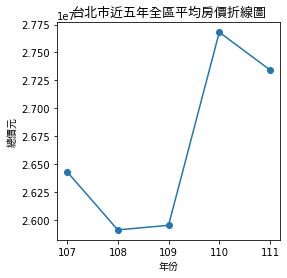

In [ ]:
plt.rcParams['figure.figsize']=(4,4)
x = a.index
y = a['總價元']
plt.title('台北市近五年全區平均房價折線圖', fontproperties=myfont, fontsize=13)
plt.xlabel('年份', fontproperties=myfont, fontsize=10)
plt.ylabel('總價元', fontproperties=myfont, fontsize=10)
plt.plot(x, y, '-o')